In [2]:
import json
import re
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split

data = pd.read_csv("./clean_data.csv")
targets = data.pop(list(data.columns)[-1])


### Missing Values

In [18]:
n = 10
miss_percent = data.isna().sum() / len(data) * 100
top_missing_cols = miss_percent.nlargest(n)
top_missing_cols_names = top_missing_cols.index.tolist()

# print the result
print(f"Top {n} columns with highest percentage of missing values:")
for col_name in top_missing_cols_names:
    pct_missing = top_missing_cols[col_name]
    print(f"{col_name}\t{pct_missing:.2f}%")


con_cat_data = pd.concat([data, targets], axis=1)
print(con_cat_data.shape)


Top 10 columns with highest percentage of missing values:
X37	43.65%
X21	13.64%
X27	6.37%
X60	4.91%
X45	4.90%
X24	2.12%
X28	1.88%
X53	1.88%
X54	1.88%
X64	1.88%
(32553, 65)


#### Notes here

In [23]:
import copy

concat_data_dropped = copy.deepcopy(con_cat_data)
concat_data_dropped = concat_data_dropped.drop("X37", axis=1)
concat_data_dropped = concat_data_dropped.dropna(axis=0)
print(concat_data_dropped.shape)


(24421, 64)


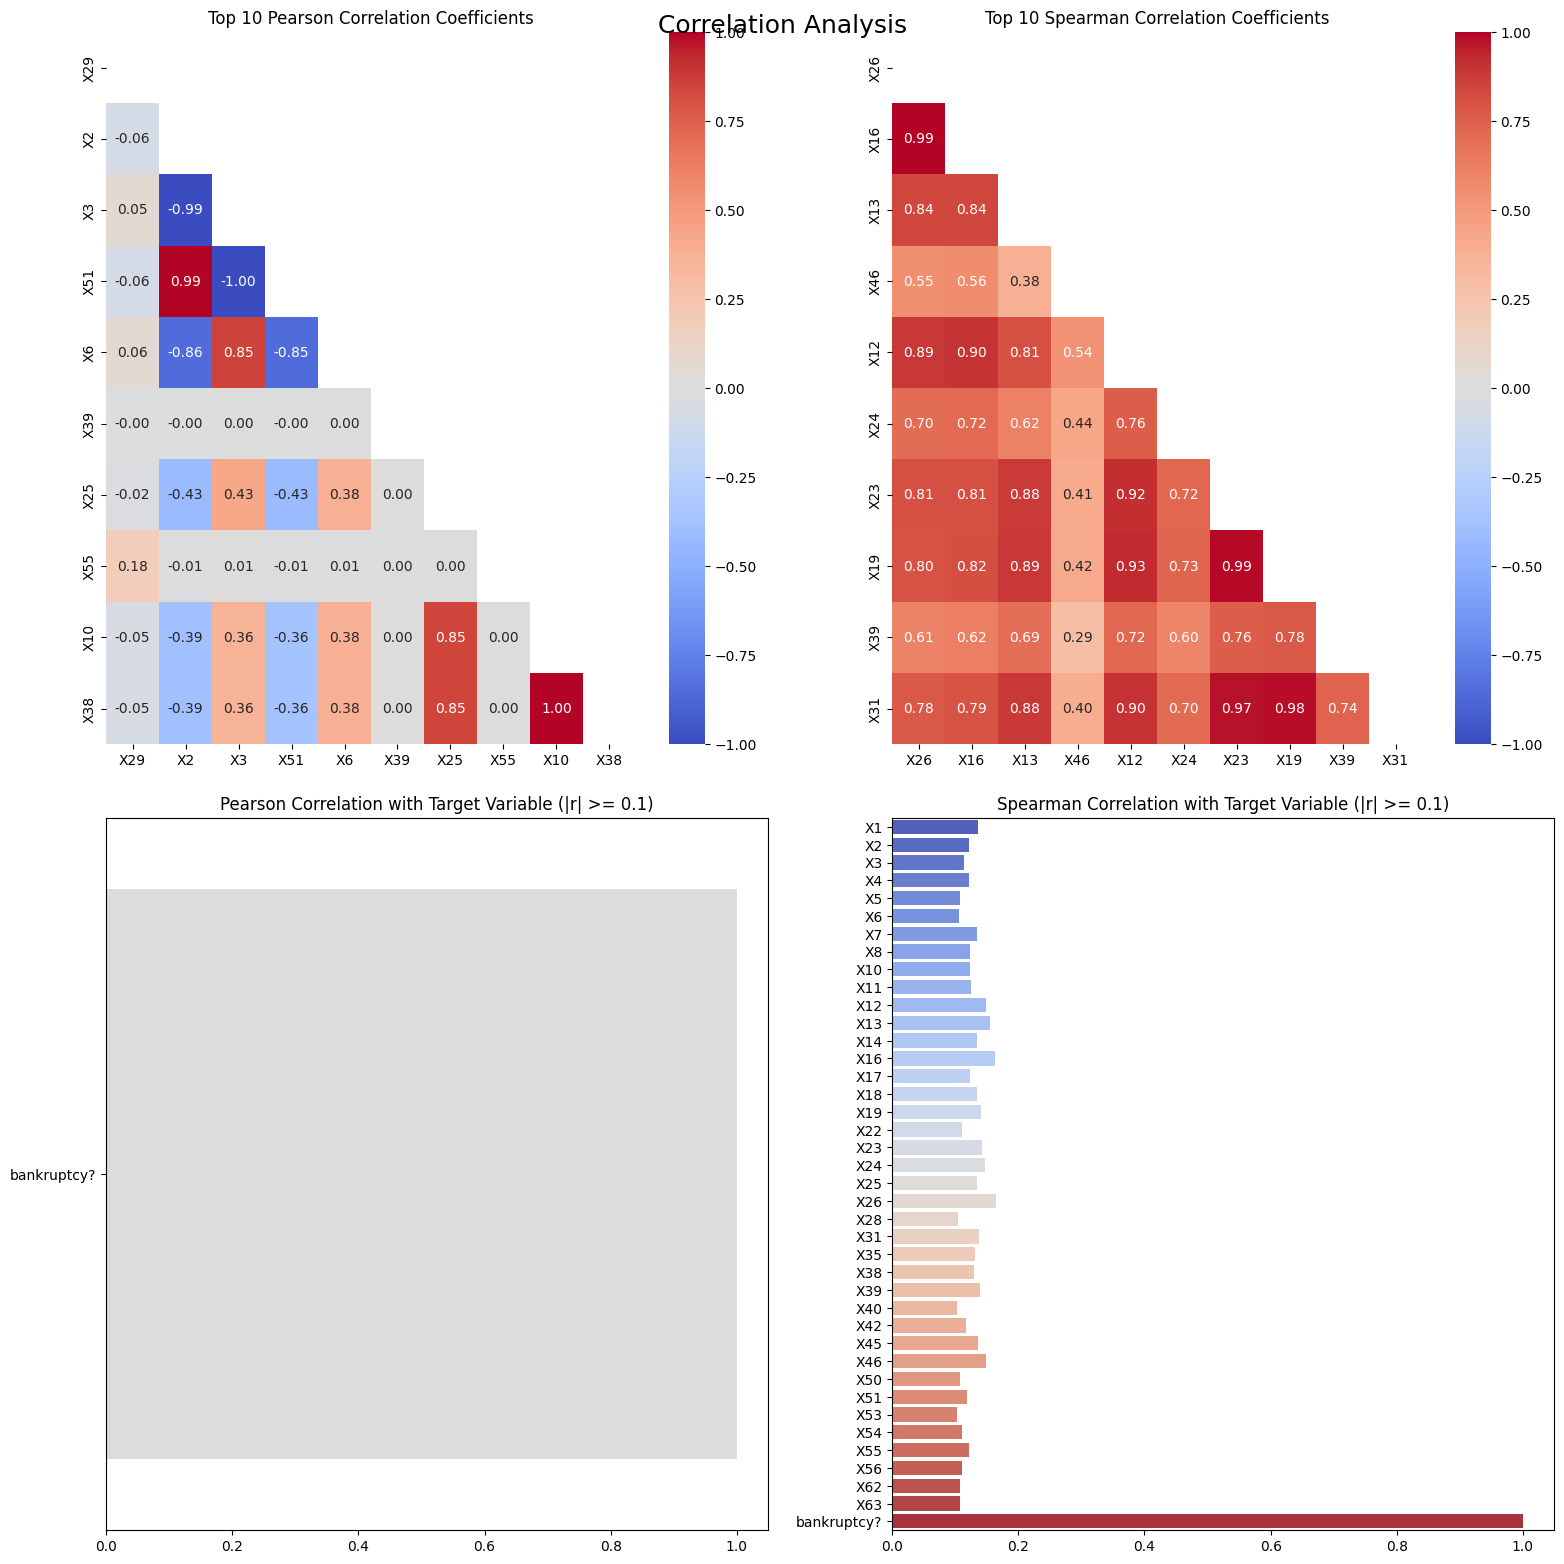

In [17]:
# calculate correlation coefficients
corr_pearson = con_cat_data.corr(method="pearson")
corr_spearman = con_cat_data.corr(method="spearman")
corr_pearson_target = corr_pearson["bankruptcy?"]
corr_spearman_target = corr_spearman["bankruptcy?"]

# create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# create the heatmap for the top 10 Pearson correlation coefficients
top_10_pearson = corr_pearson.abs().nlargest(11, "bankruptcy?")["bankruptcy?"][1:]
mask = np.triu(
    np.ones_like(
        corr_pearson.loc[top_10_pearson.index, top_10_pearson.index], dtype=bool
    )
)
sns.heatmap(
    corr_pearson.loc[top_10_pearson.index, top_10_pearson.index],
    ax=axes[0, 0],
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=False,
    mask=mask,
)
axes[0, 0].set_title("Top 10 Pearson Correlation Coefficients")

# create the heatmap for the top 10 Spearman correlation coefficients
top_10_spearman = corr_spearman.abs().nlargest(11, "bankruptcy?")["bankruptcy?"][1:]
mask = np.triu(
    np.ones_like(
        corr_spearman.loc[top_10_spearman.index, top_10_spearman.index], dtype=bool
    )
)
sns.heatmap(
    corr_spearman.loc[top_10_spearman.index, top_10_spearman.index],
    ax=axes[0, 1],
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=False,
    mask=mask,
)
axes[0, 1].set_title("Top 10 Spearman Correlation Coefficients")

# create the bar plot for the top 10 Pearson correlation coefficients with the target variable
sns.barplot(
    x=corr_pearson_target.abs()[corr_pearson_target.abs() >= 0.1].values,
    y=corr_pearson_target.abs()[corr_pearson_target.abs() >= 0.1].index,
    ax=axes[1, 0],
    palette="coolwarm",
)
axes[1, 0].set_title("Pearson Correlation with Target Variable (|r| >= 0.1)")

# create the bar plot for the top 10 Spearman correlation coefficients with the target variable
sns.barplot(
    x=corr_spearman_target.abs()[corr_spearman_target.abs() >= 0.1].values,
    y=corr_spearman_target.abs()[corr_spearman_target.abs() >= 0.1].index,
    ax=axes[1, 1],
    palette="coolwarm",
)
axes[1, 1].set_title("Spearman Correlation with Target Variable (|r| >= 0.1)")

# adjust the spacing between the subplots and the title
fig.tight_layout(pad=2.0)
plt.suptitle("Correlation Analysis", fontsize=18)
plt.show()


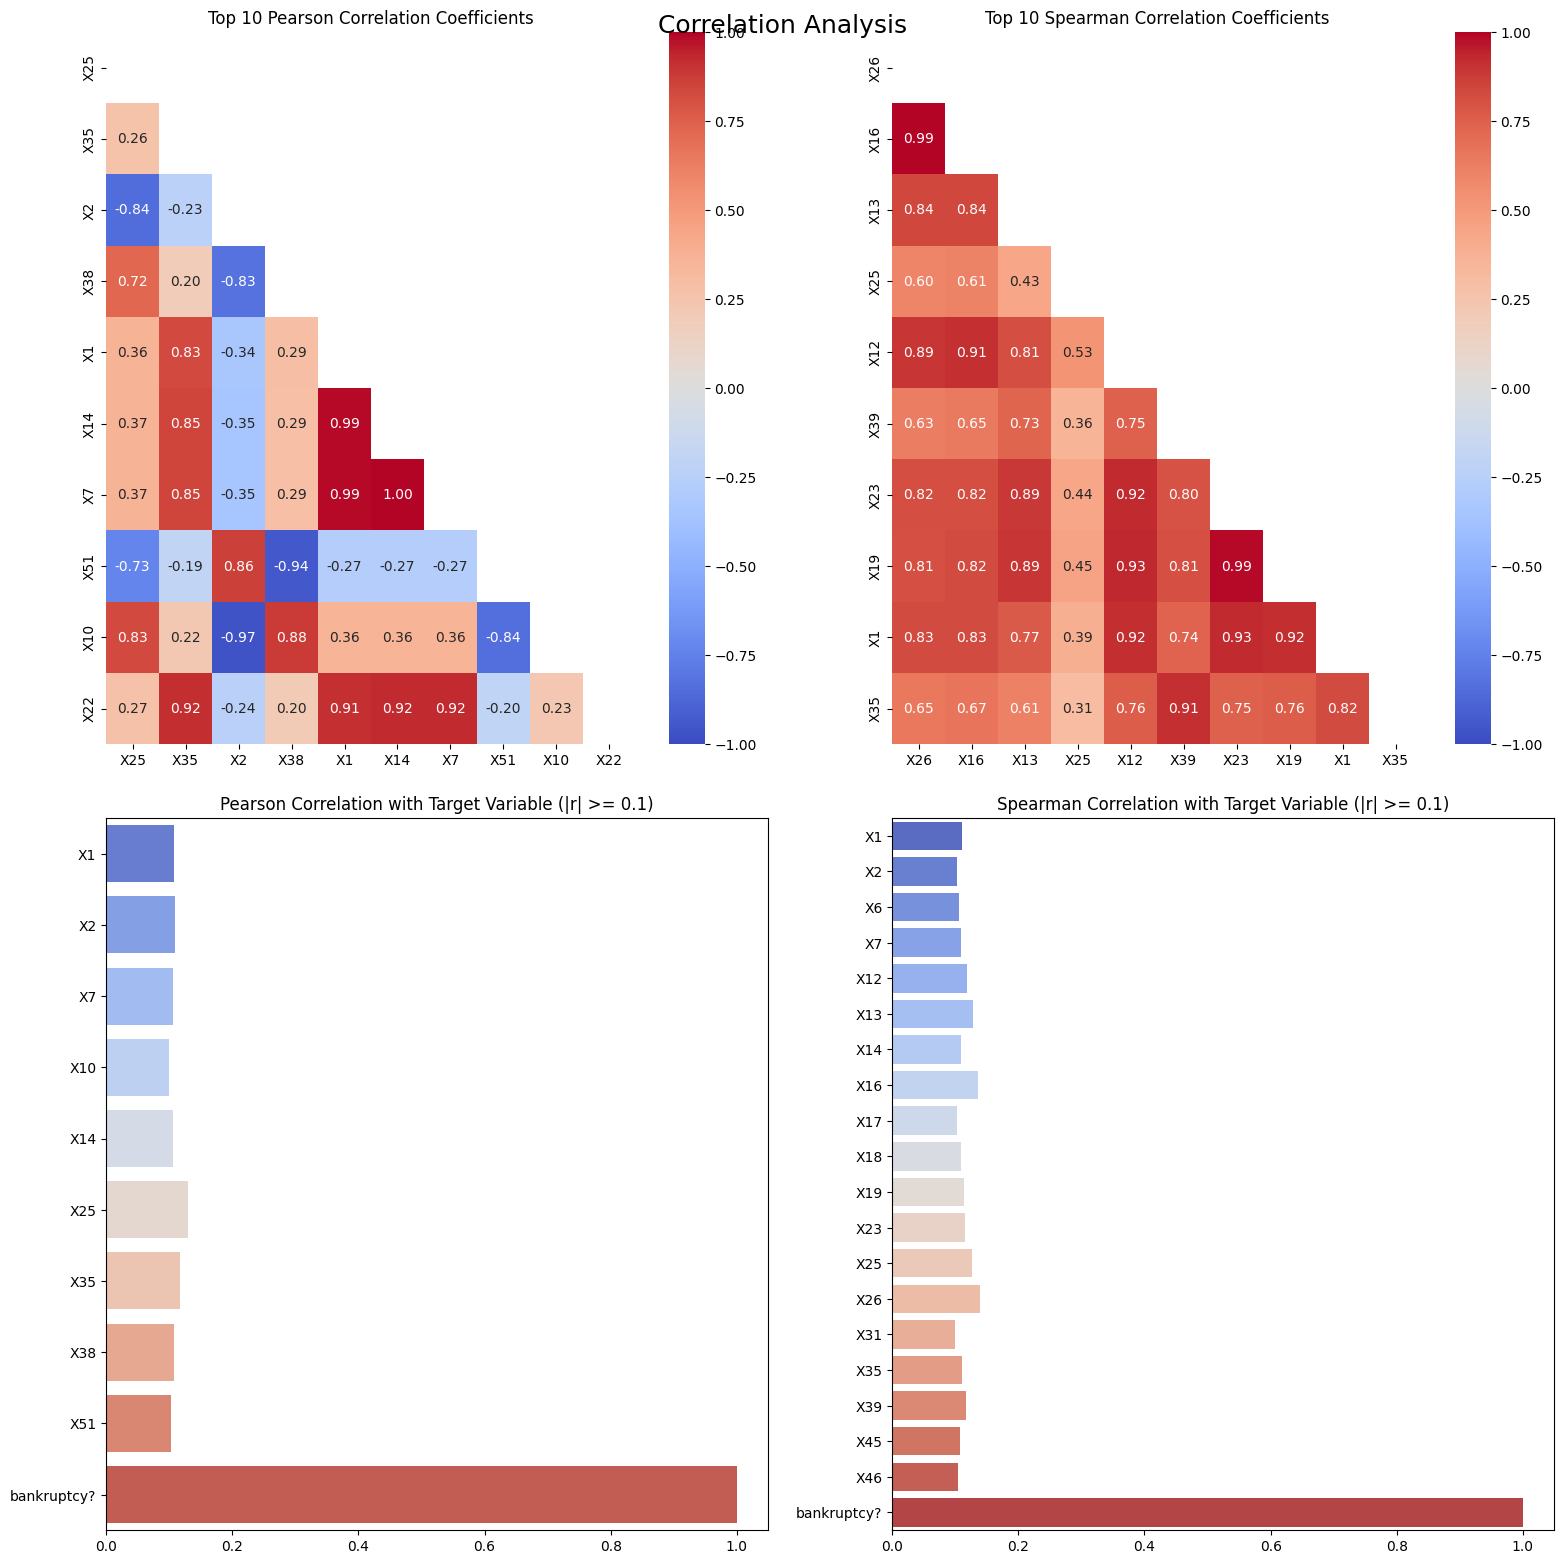

In [24]:
# calculate correlation coefficients
corr_pearson = concat_data_dropped.corr(method="pearson")
corr_spearman = concat_data_dropped.corr(method="spearman")
corr_pearson_target = corr_pearson["bankruptcy?"]
corr_spearman_target = corr_spearman["bankruptcy?"]

# create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# create the heatmap for the top 10 Pearson correlation coefficients
top_10_pearson = corr_pearson.abs().nlargest(11, "bankruptcy?")["bankruptcy?"][1:]
mask = np.triu(
    np.ones_like(
        corr_pearson.loc[top_10_pearson.index, top_10_pearson.index], dtype=bool
    )
)
sns.heatmap(
    corr_pearson.loc[top_10_pearson.index, top_10_pearson.index],
    ax=axes[0, 0],
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=False,
    mask=mask,
)
axes[0, 0].set_title("Top 10 Pearson Correlation Coefficients")

# create the heatmap for the top 10 Spearman correlation coefficients
top_10_spearman = corr_spearman.abs().nlargest(11, "bankruptcy?")["bankruptcy?"][1:]
mask = np.triu(
    np.ones_like(
        corr_spearman.loc[top_10_spearman.index, top_10_spearman.index], dtype=bool
    )
)
sns.heatmap(
    corr_spearman.loc[top_10_spearman.index, top_10_spearman.index],
    ax=axes[0, 1],
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=False,
    mask=mask,
)
axes[0, 1].set_title("Top 10 Spearman Correlation Coefficients")

# create the bar plot for the top 10 Pearson correlation coefficients with the target variable
sns.barplot(
    x=corr_pearson_target.abs()[corr_pearson_target.abs() >= 0.1].values,
    y=corr_pearson_target.abs()[corr_pearson_target.abs() >= 0.1].index,
    ax=axes[1, 0],
    palette="coolwarm",
)
axes[1, 0].set_title("Pearson Correlation with Target Variable (|r| >= 0.1)")

# create the bar plot for the top 10 Spearman correlation coefficients with the target variable
sns.barplot(
    x=corr_spearman_target.abs()[corr_spearman_target.abs() >= 0.1].values,
    y=corr_spearman_target.abs()[corr_spearman_target.abs() >= 0.1].index,
    ax=axes[1, 1],
    palette="coolwarm",
)
axes[1, 1].set_title("Spearman Correlation with Target Variable (|r| >= 0.1)")

# adjust the spacing between the subplots and the title
fig.tight_layout(pad=2.0)
plt.suptitle("Correlation Analysis", fontsize=18)
plt.show()


### Notes here

In [25]:
concat_data_dropped.to_csv("clean_data_dropped.csv", index=False)
